# Load Database Tables into Python

In [5]:
# Import Dependencies
import sqlalchemy
from sqlalchemy import create_engine
from config import db_password
import pandas as pd

In [6]:
# Import dependencies
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical
from keras.layers.advanced_activations import LeakyReLU

import matplotlib.pyplot as plt
import numpy as np


In [7]:
# read data from Postgres Database
engine = create_engine('postgresql://postgres:'+ 'Yoshi956!' +'@localhost:5432/AI_Music_DB')

instruments_df = pd.read_sql_table('Instruments_Spectrogram_Table',engine)
# instruments_df

In [8]:
# Convert Spectrograms from list to ndarray
instruments_df['Spectrogram'] = instruments_df['Spectrogram'].apply(lambda x: np.array(x))

type(instruments_df['Spectrogram'].iloc[0])

numpy.ndarray

# MODEL - Neural Network 

In [9]:
# Create train and test data sets
X_series1 = instruments_df["Spectrogram"]
y1 = instruments_df["Instrument_name"]

In [10]:
# Parameters

channels = 1 # number of audio channels
spectrogram_shape1 = X_series1[1].shape + (channels,)
batch1 = spectrogram_shape1[1]

In [11]:
X_series1[1].shape

(44, 128)

In [12]:
# Reshape X into size of spectrogram and convert to ndarray
X1 = np.array([i.reshape( (spectrogram_shape1) ) for i in X_series1])

In [13]:
# Encode pitches

le = LabelEncoder() 
y1 = le.fit_transform(y1)

# Split dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=78)

# Reshape for model
# X_train = np.array([X.reshape(20, 20, 1) for x in X_train])
# X_test = np.array([X.reshape(20, 20, 1) for x in X_test])

# onehotencoder = OneHotEncoder() 
y_test_hot1 = to_categorical(y_test1)
y_train_hot1 = to_categorical(y_train1)

In [14]:
# Troubleshooting queries
type(X_train1[1])
X_train1[1].shape
# X_train[1]

(44, 128, 1)

In [15]:
# # Model
# model = Sequential()
# # input_shape=(128, 128, 1)

# model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=spectrogram_shape))
# model.add(MaxPooling2D((4, 2), strides=(4, 2)))
# model.add(Activation('relu'))

# model.add(Conv2D(48, (5, 5), padding="valid"))
# model.add(MaxPooling2D((4, 2), strides=(4, 2)))
# model.add(Activation('relu'))

# model.add(Conv2D(48, (5, 5), padding="valid"))
# model.add(Activation('relu'))

# model.add(Flatten())
# model.add(Dropout(rate=0.5))

# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(rate=0.5))

# model.add(Dense(10))
# model.add(Activation('softmax'))

In [16]:
# model.compile(
# 	optimizer="Adam",
# 	loss="categorical_crossentropy",
# 	metrics=['accuracy'])

# model.fit(
# 	x=X_train, 
# 	y=y_train,
#     epochs=12,
#     batch_size=batch,
#     validation_data= (X_test, y_test))

# score = model.evaluate(
# 	x=X_test,
# 	y=y_test)

# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [17]:
# Model
instruments_model = Sequential()
instruments_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(spectrogram_shape1),padding='same'))
instruments_model.add(LeakyReLU(alpha=0.1))
instruments_model.add(MaxPooling2D((2, 2),padding='same'))
instruments_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
instruments_model.add(LeakyReLU(alpha=0.1))
instruments_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
instruments_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
instruments_model.add(LeakyReLU(alpha=0.1))                  
instruments_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
instruments_model.add(Flatten())
instruments_model.add(Dense(128, activation='linear'))
instruments_model.add(LeakyReLU(alpha=0.1))                  
instruments_model.add(Dense(14, activation='softmax')) ########### make 14 variable for instrument num

In [18]:
instruments_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [19]:
# fashion_model.summary()

In [22]:
instruments_train = instruments_model.fit(X_train1, y_train_hot1, batch_size=batch1,epochs=8,verbose=1,validation_data=(X_test1, y_test_hot1))

Train on 2184 samples, validate on 729 samples
Epoch 1/8
2184/2184 [==============================] - 23s 10ms/step - loss: 0.3226 - accuracy: 0.9002 - val_loss: 0.6454 - val_accuracy: 0.7874
Epoch 2/8
2184/2184 [==============================] - 22s 10ms/step - loss: 0.2298 - accuracy: 0.9272 - val_loss: 0.6277 - val_accuracy: 0.7833
Epoch 3/8
2184/2184 [==============================] - 25s 11ms/step - loss: 0.1923 - accuracy: 0.9396 - val_loss: 0.8731 - val_accuracy: 0.7435
Epoch 4/8
2184/2184 [==============================] - 25s 12ms/step - loss: 0.2501 - accuracy: 0.9162 - val_loss: 0.8197 - val_accuracy: 0.7641
Epoch 5/8
2184/2184 [==============================] - 20s 9ms/step - loss: 0.1912 - accuracy: 0.9432 - val_loss: 0.7130 - val_accuracy: 0.7599
Epoch 6/8
2184/2184 [==============================] - 19s 9ms/step - loss: 0.1608 - accuracy: 0.9501 - val_loss: 0.7919 - val_accuracy: 0.7586
Epoch 7/8
2184/2184 [==============================] - 19s 9ms/step - loss: 0.1002 - 

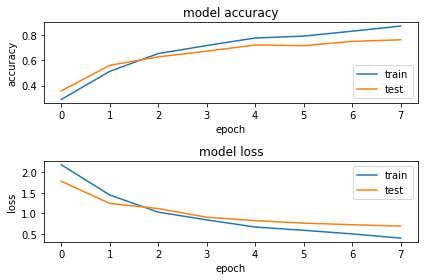

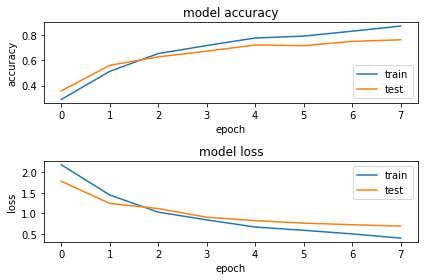

In [21]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(instruments_train.history['accuracy'])
plt.plot(instruments_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(instruments_train.history['loss'])
plt.plot(instruments_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig